# Twitter Sentiment Investing Strategy

**Load Twitter Sentiment Data**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
import os
import matplotlib.ticker as mtick

plt.style.use('ggplot')

data_folder = '/Users/phongsakonkonrad/Desktop/projects/twitter-sentiment-investing-strategy'

sentiment_df = pd.read_csv(os.path.join(data_folder, 'sentiment_data.csv'))

sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

sentiment_df = sentiment_df.set_index(['date', 'symbol'])

# Prevent bots by using engagement ration. Post with a lot of likes vs comments are mostly bots
sentiment_df['engagement_ratio'] = sentiment_df['twitterComments']/sentiment_df['twitterLikes']

sentiment_df = sentiment_df[(sentiment_df['twitterLikes']>20)&(sentiment_df['twitterComments']>10)]

sentiment_df

twitterPosts  twitterComments  twitterLikes  \
date       symbol                                                
2021-11-18 AAPL           811.0           2592.0       21674.0   
           AMD            150.0            675.0        2949.0   
           AMZN           557.0           1315.0       12969.0   
           ATVI            82.0             36.0         131.0   
           BA              61.0             55.0         342.0   
...                         ...              ...           ...   
2023-01-04 T              184.0           3409.0       14271.0   
           TSLA          6767.0         540711.0     3810688.0   
           TSN             35.0            168.0         460.0   
           V              132.0           1008.0        5943.0   
           XOM            212.0            374.0        2071.0   

                   twitterImpressions  twitterSentiment  engagement_ratio  
date       symbol                                                          
2021-11-18 AAPL             7981808.0               NaN          0.119590  
           AMD              1645270.0               NaN          0.228891  
           AMZN             5590695.0               NaN          0.101396  
           ATVI             1310715.0               NaN          0.274809  
           BA                425847.0               NaN          0.160819  
...                               ...               ...               ...  
2023-01-04 T                 884935.0          0.590457          0.238876  
           TSLA            55464921.0          0.543057          0.141893  
           TSN                57207.0          0.561900          0.365217  
           V                 139835.0          0.567286          0.169611  
           XOM               483389.0          0.588914          0.180589  

[25375 rows x 6 columns]

**Aggregate monthly and calculate average sentiment for the month**

In [2]:
aggragated_df = (sentiment_df.reset_index('symbol').groupby([pd.Grouper(freq='M'), 'symbol'])
[['engagement_ratio']].mean())

aggragated_df['rank'] = (aggragated_df.groupby(level=0)['engagement_ratio'].transform(lambda x: x.rank(ascending=False)))

aggragated_df

engagement_ratio  rank
date       symbol                        
2021-11-30 AAL             0.203835  37.0
           AAPL            0.256318  23.0
           ABBV            0.244677  26.0
           ABT             0.313368  14.0
           AES             0.864613   2.0
...                             ...   ...
2023-01-31 TMO             0.333313  19.0
           TSLA            0.151992  72.0
           TSN             0.280553  30.0
           V               0.194045  60.0
           XOM             0.217904  53.0

[1109 rows x 2 columns]

**Select top 10 stocks**


In [3]:
filtered_df = aggragated_df[aggragated_df['rank']<11]

filtered_df = filtered_df.reset_index(level=1)

filtered_df.index = filtered_df.index + pd.DateOffset(1)

filtered_df = filtered_df.reset_index().set_index(['date', 'symbol'])

filtered_df


engagement_ratio  rank
date       symbol                        
2021-12-01 AES             0.864613   2.0
           BA              0.421166   8.0
           DAL             0.618896   6.0
           FCX             0.626323   5.0
           GS              0.376872  10.0
...                             ...   ...
2023-02-01 FCX             0.667387   3.0
           GILD            0.465874   6.0
           KEY             0.393034  10.0
           MDT             0.806841   2.0
           NCLH            0.445543   7.0

[150 rows x 2 columns]

**Create dict containing the selected stocks and beginning of the month**



In [4]:
dates = filtered_df.index.get_level_values('date').unique().tolist()

fixed_dates = {}

for d in dates:
    
    fixed_dates[d.strftime('%Y-%m-%d')] = filtered_df.xs(d, level=0).index.tolist()
    
fixed_dates

{'2021-12-01': ['AES',
  'BA',
  'DAL',
  'FCX',
  'GS',
  'J',
  'MNST',
  'OXY',
  'REGN',
  'SLB'],
 '2022-01-01': ['A', 'BA', 'D', 'EL', 'FCX', 'ILMN', 'L', 'LUV', 'MA', 'OXY'],
 '2022-02-01': ['AES',
  'AMD',
  'D',
  'DD',
  'FCX',
  'ILMN',
  'LUV',
  'MA',
  'MNST',
  'STZ'],
 '2022-03-01': ['BA',
  'BIIB',
  'D',
  'FCX',
  'GILD',
  'HBAN',
  'LUV',
  'MRO',
  'OXY',
  'PFE'],
 '2022-04-01': ['A',
  'AAL',
  'BA',
  'CRM',
  'DD',
  'FCX',
  'KEY',
  'PFE',
  'PM',
  'STZ'],
 '2022-05-01': ['AMD', 'CB', 'CRM', 'CVX', 'DD', 'FCX', 'J', 'KEY', 'L', 'PM'],
 '2022-06-01': ['AEP',
  'AES',
  'AMD',
  'BIIB',
  'CRM',
  'DD',
  'DG',
  'FCX',
  'KEY',
  'LMT'],
 '2022-07-01': ['CB',
  'CRM',
  'DD',
  'EA',
  'FCX',
  'GS',
  'ILMN',
  'KEY',
  'REGN',
  'STZ'],
 '2022-08-01': ['A',
  'DD',
  'EA',
  'JPM',
  'META',
  'NCLH',
  'RCL',
  'REGN',
  'STZ',
  'TSN'],
 '2022-09-01': ['ABT',
  'AMZN',
  'D',
  'DIS',
  'KEY',
  'L',
  'META',
  'MRNA',
  'NFLX',
  'PYPL'],
 '2022-10-01'

**Download current stock prices**

In [5]:
stocks_list = sentiment_df.index.get_level_values('symbol').unique().tolist()

prices_df = yf.download(tickers=stocks_list,
                       start='2021-01-01',
                        end='2023-03-01')


[*********************100%***********************]  85 of 85 completed


**Calculate return with monthly rebalancing**


In [6]:
returns_df = np.log(prices_df['Adj Close']).diff().dropna()

portfolio_df = pd.DataFrame()

for start_date in fixed_dates.keys():
    
    end_date = (pd.to_datetime(start_date)+pd.offsets.MonthEnd()).strftime('%Y-%m-%d')
    
    cols = fixed_dates[start_date]
    
    temp_df = returns_df[start_date:end_date][cols].mean(axis=1).to_frame('portfolio_return')
    
    portfolio_df = pd.concat([portfolio_df, temp_df], axis=0)
    
portfolio_df
    

,portfolio_return
Date,
2021-12-01,-0.025165
2021-12-02,0.034325
2021-12-03,-0.008779
2021-12-06,0.021157
2021-12-07,0.022291
...,...
2023-02-22,-0.008174
2023-02-23,-0.004385
2023-02-24,-0.008449


**Compare to NASDAQ**


In [7]:
qqq_df = yf.download(tickers ='QQQ',
                    start='2021-01-01',
                    end='2023-03-01')

qqq_ret = np.log(qqq_df['Adj Close']).diff().to_frame('nasdaq_return')

portfolio_df = portfolio_df.merge(qqq_ret,
                                 left_index=True,
                                 right_index=True)

portfolio_df



[*********************100%***********************]  1 of 1 completed


,portfolio_return,nasdaq_return
Date,,
2021-12-01,-0.025165,-0.017159
2021-12-02,0.034325,0.007181
2021-12-03,-0.008779,-0.017542
2021-12-06,0.021157,0.007981
2021-12-07,0.022291,0.029669
...,...,...
2023-02-22,-0.008174,0.000748
2023-02-23,-0.004385,0.008696
2023-02-24,-0.008449,-0.016886


**Visualize Bench Mark**

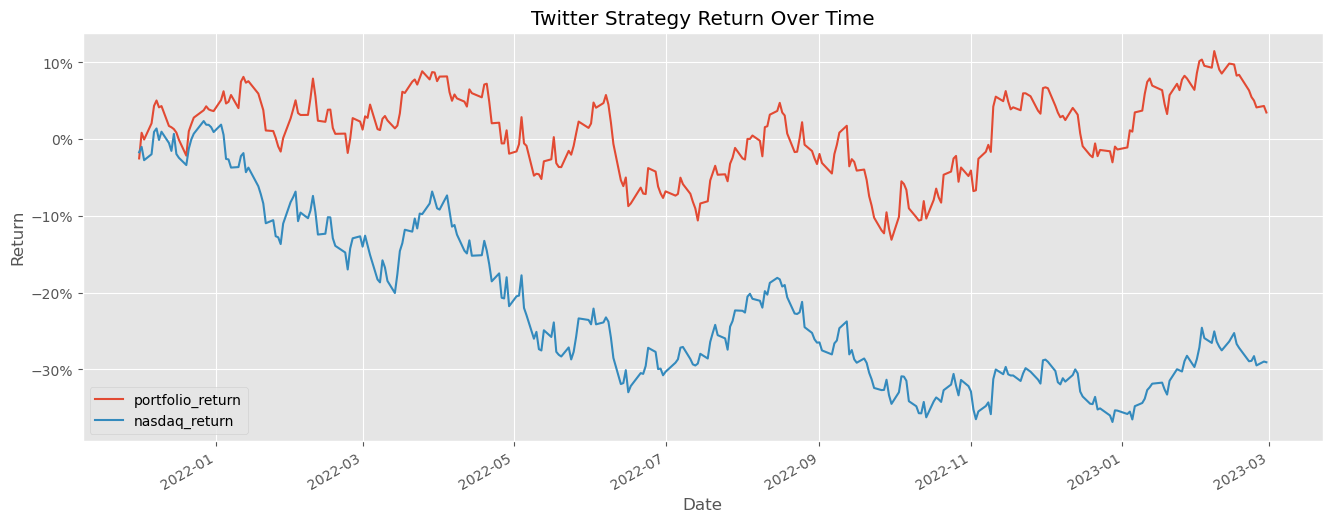

In [8]:
portfolios_cumulative_return = np.exp(np.log1p(portfolio_df).cumsum()).sub(1)

portfolios_cumulative_return.plot(figsize=(16,6))

plt.title('Twitter Strategy Return Over Time')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.ylabel('Return')

plt.show()